In [13]:
import datasets
from transformers import VisionEncoderDecoderModel, AutoTokenizer, ViTModel, ViTImageProcessor, ViTFeatureExtractor
import wandb
import cv2
from PIL import Image

In [14]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
# processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

ViT =  ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained("google/vit-base-patch16-224-in21k", "gpt2")

/Users/varad/miniconda3/envs/assign7/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.crossattention.c_attn.bias', 'h.0.crossattention.c_attn.weight', 'h.0.crossattention.c_proj.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.q_attn.bias', 'h.0.crossattention.q_attn.weight', 'h.0.ln_cross_attn.bias', 'h.0.ln_cross_attn.weight', 'h.1.crossattention.c_attn.bias', 'h.1.crossattention.c_attn.weight', 'h.1.crossattention.c_proj.bias', 'h.1.crossattention.c_proj.weight', 'h.1.crossattention.q_attn.bias', 'h.1.crossattention.q_attn.weight', 'h.1.ln_cross_attn.bias', 'h.1.ln_cross_attn.weight', 'h.10.crossattention.c_attn.bias', 'h.10.crossattention.c_attn.weight', '

In [15]:
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size
# set beam search parameters
model.config.eos_token_id = tokenizer.sep_token_id
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.max_length = 128
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

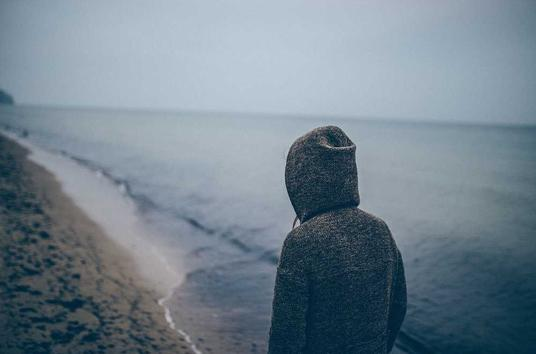

In [16]:
img = Image.open("8-536x354.jpg").convert("RGB")
img

In [17]:
feature_extractor(img, return_tensors="pt").pixel_values

tensor([[[[-0.1922, -0.1765, -0.1529,  ..., -0.2157, -0.2314, -0.2471],
          [-0.1843, -0.1686, -0.1451,  ..., -0.2000, -0.2157, -0.2314],
          [-0.1765, -0.1608, -0.1451,  ..., -0.2000, -0.2157, -0.2314],
          ...,
          [-0.8275, -0.8039, -0.8196,  ..., -0.9765, -0.9765, -0.9765],
          [-0.8588, -0.8275, -0.8196,  ..., -0.9686, -0.9686, -0.9686],
          [-0.8824, -0.8745, -0.8275,  ..., -0.9765, -0.9765, -0.9765]],

         [[-0.0431, -0.0275, -0.0039,  ..., -0.0667, -0.0824, -0.0980],
          [-0.0353, -0.0196,  0.0039,  ..., -0.0510, -0.0667, -0.0824],
          [-0.0275, -0.0118,  0.0039,  ..., -0.0510, -0.0667, -0.0824],
          ...,
          [-0.5922, -0.5686, -0.5843,  ..., -0.6784, -0.6784, -0.6784],
          [-0.6235, -0.6000, -0.5922,  ..., -0.6706, -0.6706, -0.6706],
          [-0.6627, -0.6549, -0.6078,  ..., -0.6784, -0.6784, -0.6784]],

         [[ 0.0745,  0.0902,  0.1137,  ...,  0.0510,  0.0353,  0.0196],
          [ 0.0824,  0.0980,  

In [25]:
output = model.generate(feature_extractor(img, return_tensors="pt").pixel_values, max_length=64)
few_shot_model = VisionEncoderDecoderModel.from_pretrained('models/few_shot')
few_shot_output = few_shot_model.generate(feature_extractor(img, return_tensors="pt").pixel_values, max_length=64)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [26]:
token_ids = few_shot_output[0].tolist()

print(tokenizer.decode(token_ids))

<|endoftext|>A man who was shot and killed by police in a parking lot in the city's west end on Sunday night is in custody.

The shooting happened around 8:30 p.m. in the parking lot of the West End Apartments on the corner of West and West Broadway.

A man was


In [20]:
token_ids = output[0].tolist()

print(tokenizer.decode(token_ids))

<|endoftext|>"I think it's important for us to make sure that we're doing everything we can to ensure that we have the best possible service for our customers," he said.

"It's important to us that our customers have access to the most up-to-date information that they need to make informed decisions about what they're buying."

Topics: business-economics-and-finance, australia, asia

First posted<|endoftext|>


In [21]:
from torchvision import datasets


In [22]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
)


In [23]:
import torch
from torchvision.transforms import v2
transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [24]:
ds = transforms(ds)

def image_function(data_entry):
    return {'img': Image.open().convert("RGB")}

TypeError: No image, video, mask or bounding box was found in the sample

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,